In [1]:
import pandas as pd

In [3]:
df =pd.read_csv("customer_churn_data.csv")

In [4]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [6]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [7]:
df["InternetService"]

0      Fiber Optic
1      Fiber Optic
2      Fiber Optic
3              DSL
4              NaN
          ...     
995    Fiber Optic
996            NaN
997    Fiber Optic
998            NaN
999            NaN
Name: InternetService, Length: 1000, dtype: object

In [9]:
df["InternetService"] = df["InternetService"].fillna("")
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [10]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [14]:
numeric_col_data = df.select_dtypes(["number"])
numeric_col_data

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
0,1,49,4,88.35,353.40
1,2,43,0,36.67,0.00
2,3,51,2,63.79,127.58
3,4,60,8,102.34,818.72
4,5,42,32,69.01,2208.32
...,...,...,...,...,...
995,996,42,41,37.14,1522.74
996,997,62,9,80.93,728.37
997,998,51,15,111.72,1675.80
998,999,39,68,65.67,4465.56


In [15]:
numeric_col_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


-1-> strong negative     +1->strong positive

In [19]:
import matplotlib.pyplot as plt

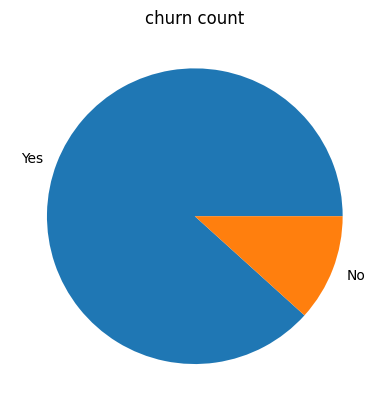

In [21]:
df["Churn"].value_counts().plot(kind="pie") 
plt.title("churn count")
plt.ylabel("")
plt.show()

In [22]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [23]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [24]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [25]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [26]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

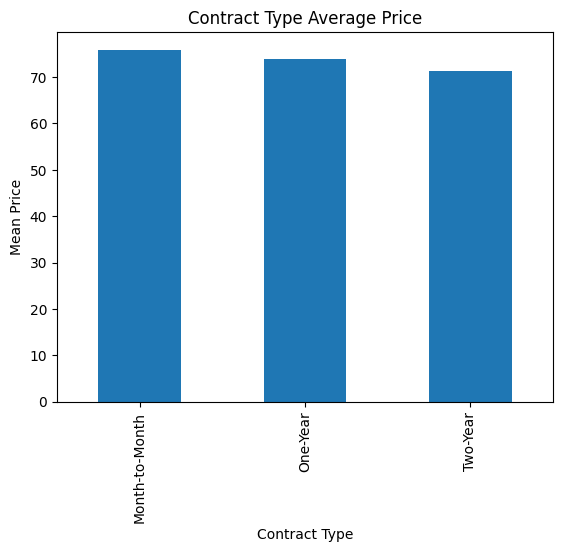

In [31]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Price")
plt.xlabel("Contract Type")
plt.title("Contract Type Average Price")
plt.show()

In [33]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


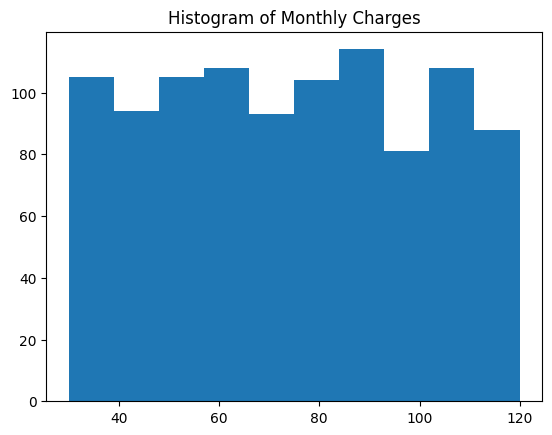

In [35]:
plt.hist(df["MonthlyCharges"])
plt.title("Histogram of Monthly Charges")
plt.show()

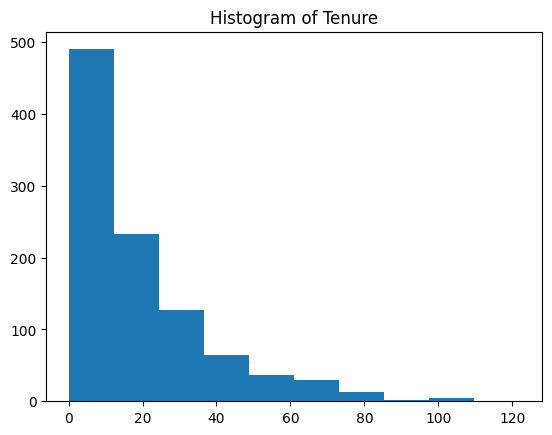

In [36]:
plt.hist(df["Tenure"])
plt.title("Histogram of Tenure")
plt.show()

Feature Engineering

In [37]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [67]:
y=df[["Churn"]]
x = df[["Age","Gender","Tenure","MonthlyCharges"]]

In [68]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [69]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [70]:
x["Gender"]=x["Gender"].apply(lambda x:1 if x=="Female" else 0)

C:\Users\HP\AppData\Local\Temp\ipykernel_40400\4206118211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Gender"]=x["Gender"].apply(lambda x:1 if x=="Female" else 0)


In [71]:
x.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [72]:
type(x["Gender"][0])

numpy.int64

In [73]:
y["Churn"] = y["Churn"].apply(lambda x: 1 if x== "Yes" else 0)

C:\Users\HP\AppData\Local\Temp\ipykernel_40400\1130062783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Churn"] = y["Churn"].apply(lambda x: 1 if x== "Yes" else 0)


In [75]:
y

,Churn
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


In [77]:
type(y["Churn"][0])

numpy.int64

In [79]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size =0.2)

In [80]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()

In [83]:
x_train = scaler.fit_transform(x_train)

In [84]:
x_train

array([[ 1.90948992,  0.93463164, -1.03204917,  0.11171317],
       [ 0.04341222, -1.06994024, -0.97853353,  0.38218389],
       [ 1.90948992,  0.93463164, -0.71095531, -1.34221291],
       ...,
       [-1.30431056,  0.93463164, -0.8179866 , -1.50332785],
       [-1.30431056, -1.06994024, -0.76447096, -1.54496867],
       [-1.09696859,  0.93463164, -0.12228324,  1.5847084 ]],
      shape=(800, 4))

In [85]:
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [87]:
x_test = scaler.fit_transform(x_test)

In [89]:
x_test.shape

(200, 4)

Modelling

In [105]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print("Accuracy score on model is {}".format(accuracy_score(y_test,predictions)))

Prediction Using Logistic Regression

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [96]:
log_model = LogisticRegression()

In [98]:
import warnings
warnings.filterwarnings("ignore")

In [99]:
log_model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [107]:
y_pred = log_model.predict(x_test)

In [108]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [109]:
modelperformance(y_pred)

Accuracy score on model is 0.87


Prediction Using K Nearest Neighbors

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
param_grid ={
    "n_neighbors" : [3,5,7,9,11, 15, 20],
    "weights" :["uniform","distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]

}

In [119]:
gridkn = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
gridkn.fit(x_train,y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'algorithm': ['auto', 'ball_tree', ...], 'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,15


In [120]:
gridkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'uniform'}

In [121]:
y_pred = gridkn.predict(x_test)

In [122]:
modelperformance(y_pred)

Accuracy score on model is 0.88


Prediction Using Support Vector Machine

In [124]:
from sklearn.svm import SVC

In [125]:
svm = SVC()

In [136]:
param_grid ={
    "C" : [0.01,0.1,0.5,1,1.5,1.05],
    "kernel":["linear","rbf","poly"],
    
}

In [137]:
gridsvc = GridSearchCV(svm,param_grid,cv=5)

In [138]:
gridsvc.fit(x_train,y_train)

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.01


In [139]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [140]:
y_pred=gridsvc.predict(x_test)

In [141]:
modelperformance(y_pred)

Accuracy score on model is 0.88


Prediction Using Decision Tree Classifier

In [142]:
from sklearn.tree import DecisionTreeClassifier

In [148]:
param_grid={
    "criterion":["gini","entropy"],
    "splitter" :["best","random"],
    "max_depth":[None,10,20,30,40],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [149]:
grid_tree=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

In [150]:
grid_tree.fit(x_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [151]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [152]:
y_pred = grid_tree.predict(x_test)

In [153]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [154]:
modelperformance(y_pred)

Accuracy score on model is 0.83


Prediction Using Random Forest Classifier

In [155]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [156]:
param_grid={
    "n_estimators":[32,64,128,256],
    "max_features":[2,3,4,5],
    "bootstrap":[True,False]
}

In [157]:
grid_rfc = GridSearchCV(rfc_model,param_grid,cv=5)

In [158]:
grid_rfc.fit(x_train,y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_features': [2, 3, ...], 'n_estimators': [32, 64, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,256


In [159]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 256}

In [161]:
y_pred=grid_rfc.predict(x_test)

In [162]:
modelperformance(y_pred)

Accuracy score on model is 0.86


In [166]:
best_model=gridsvc.best_estimator_

In [167]:
joblib.dump(best_model,"model.pkl")

['model.pkl']